In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



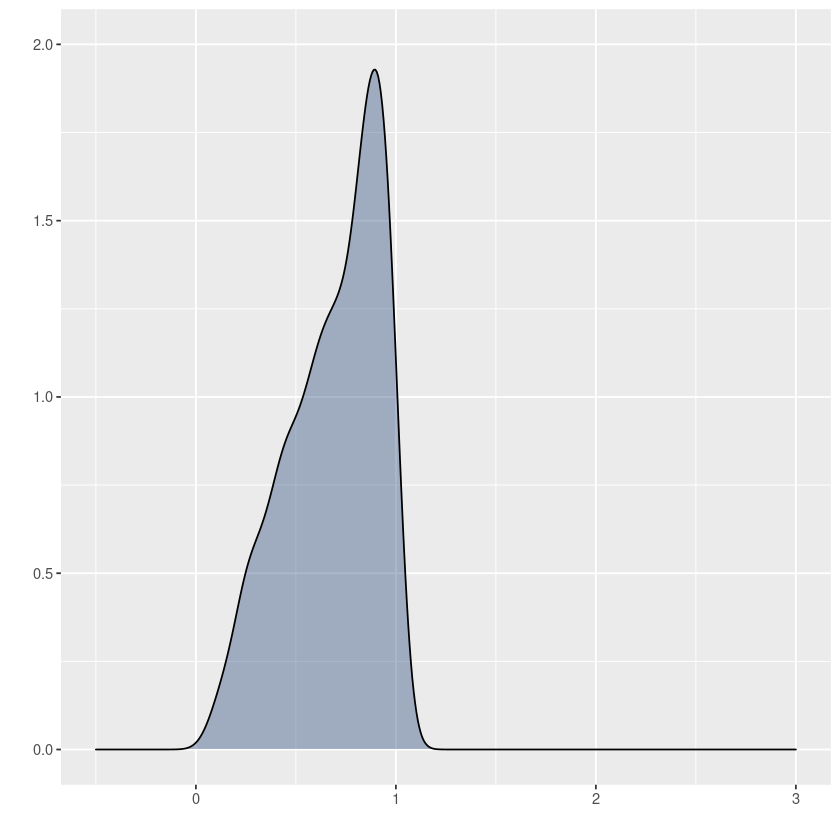

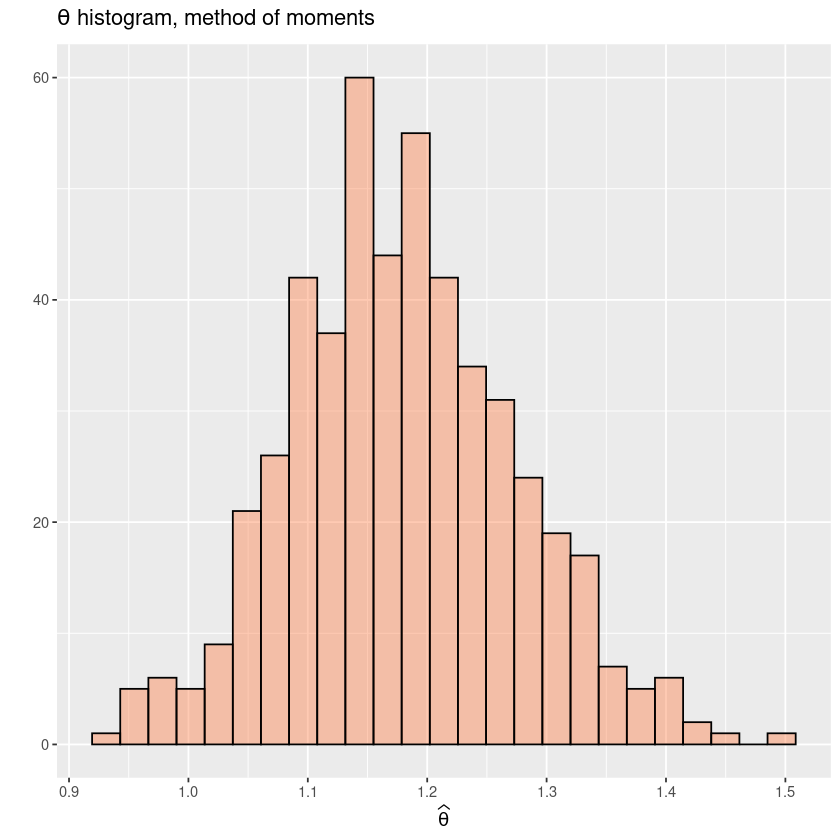

[1] 1.17914181 0.09443108
[1] 1.1791418 0.1035309
[1] "The confidence interval is:"
     2.5%     97.5% 
0.9913551 1.3780778 
[1] "The confidence interval is:"
     2.5%     97.5% 
0.9806669 1.4013264 


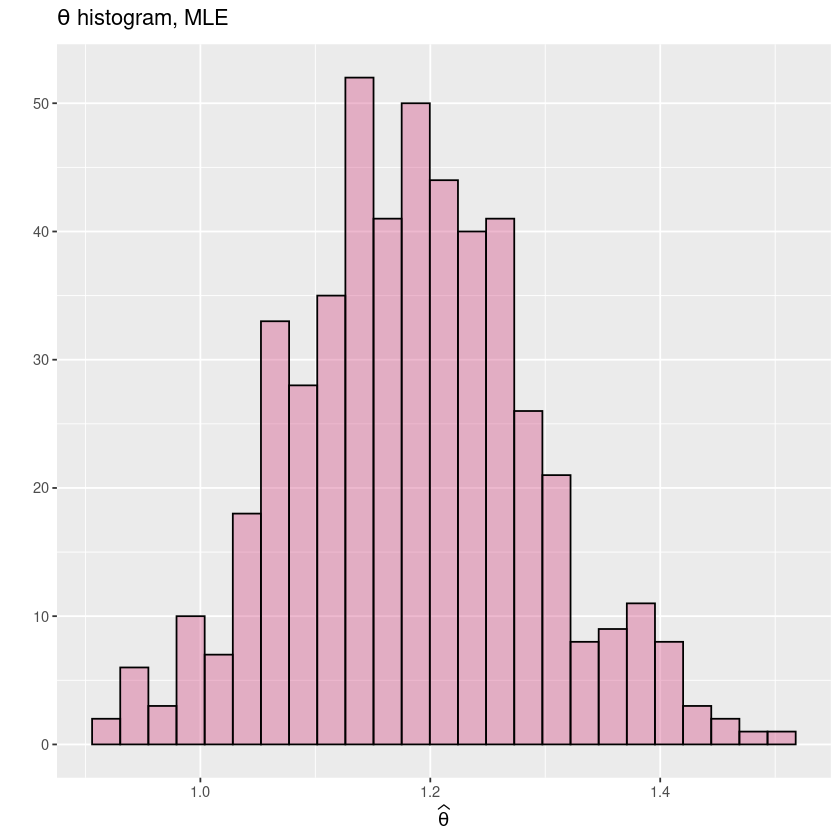

In [103]:
set.seed(1980)

n <- 500
theta <- 1.2

x <- runif(n, 0, 1)

x_mod <- x^(1/(theta + 1))

theta_hats <- rep(0, n)
theta_hats_alt <- rep(0, n)

for (i in 1:n){
    temp_set <- sample(x_mod, n, replace = TRUE)
    theta_hats[i] <- - 1 - 1 / mean(log(temp_set))
    theta_hats_alt[i] <- (1 - 2 * mean(temp_set))/(mean(temp_set) - 1)
}

ggplot() + geom_histogram(boundary = 0, bins = 25, fill = "#ff7c43", 
                          alpha = 0.4, color = "black", aes(x = theta_hats)) +
           xlab("") + ylab("") + xlab(expression(widehat(theta))) + ggtitle(theta~ "histogram, method of moments")

ggplot() + geom_histogram(boundary = 0, bins = 25, fill = "#d45087", 
                          alpha = 0.4, color = "black", aes(x = theta_hats_alt)) +
           xlab("") + ylab("") + xlab(expression(widehat(theta))) + ggtitle(theta~ "histogram, MLE")

mu <- mean(theta_hats)
mu_alt <- mean(theta_hats_alt)

se_theta <- sqrt(sum((theta_hats - mu)^2)/n)
se_theta_alt <- sqrt(sum((theta_hats_alt - mu_alt)^2)/n)

print(c(mu, se_theta))
print(c(mu, se_theta_alt))

print("The confidence interval is:")
print(c(quantile(theta_hats, 0.025), quantile(theta_hats, 0.975)))

print("The confidence interval is:")
print(c(quantile(theta_hats_alt, 0.025), quantile(theta_hats_alt, 0.975)))

In [36]:
typeof(theta_hats)
typeof(x_mod)

[1] "double"

[1] "double"

[1] 0.6005561

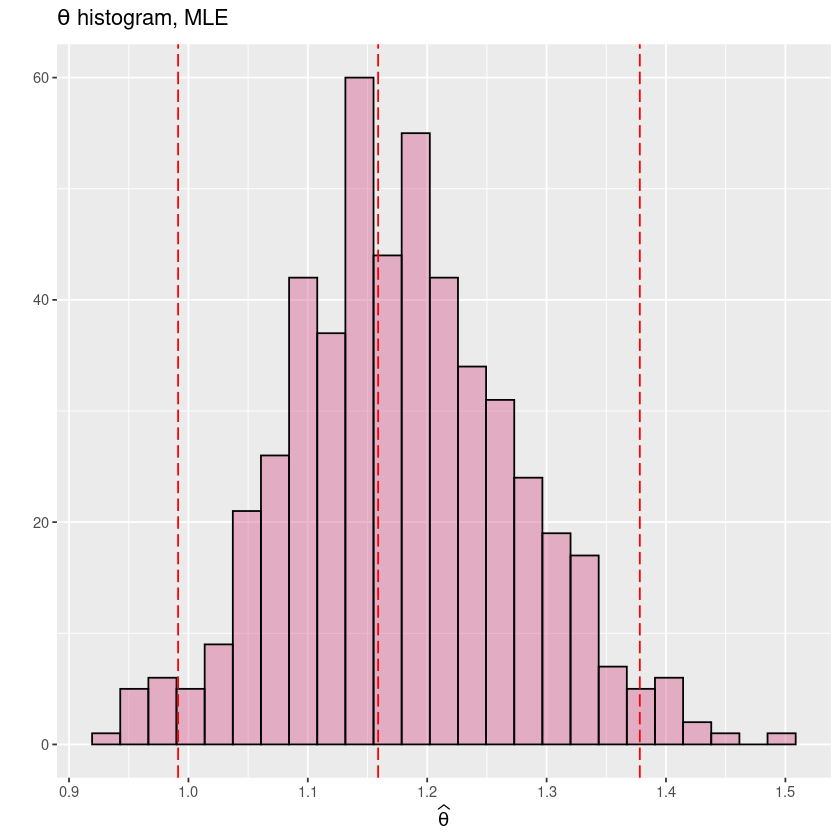

[1] 1.17914181 0.09443108
[1] "The confidence interval is:"
     2.5%     97.5% 
0.9913551 1.3780778 


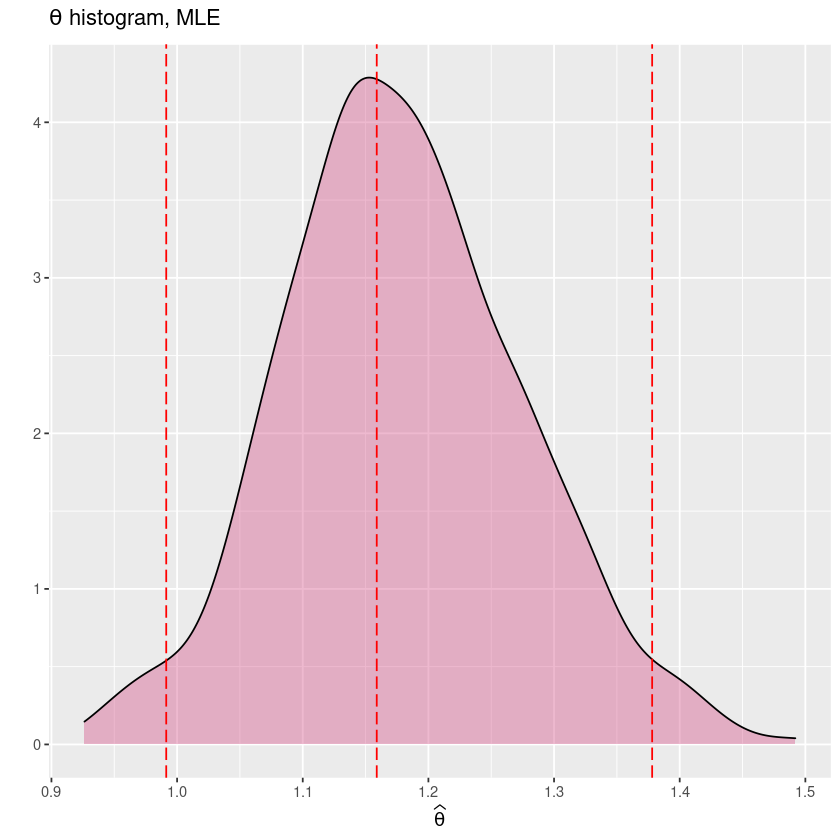

In [119]:
set.seed(1980)

n <- 500
theta <- 1.2

x <- runif(n, 0, 1)

x_mod <- x^(1/(theta + 1))

theta_hats <- rep(0, n)
theta_hats_alt <- rep(0, n)

for (i in 1:n){
    temp_set <- sample(x_mod, n, replace = TRUE)
    theta_hats[i] <- - 1 - 1 / mean(log(temp_set)) #MLE
    theta_hats_alt[i] <- (1 - 2 * mean(temp_set))/(mean(temp_set) - 1) #MOM
}

ggplot() + geom_histogram(boundary = 0, bins = 25, fill = "#d45087", 
                          alpha = 0.4, color = "black", aes(x = theta_hats)) +
           xlab("") + ylab("") + xlab(expression(widehat(theta))) + ggtitle(theta~ "histogram, MLE") + 
           geom_vline(mapping = NULL, xintercept = mu, linetype = "longdash", color = "red") + 
           geom_vline(mapping = NULL, xintercept = quantile(theta_hats, 0.025), 
                      linetype = "longdash", color = "red") + 
           geom_vline(mapping = NULL, xintercept = quantile(theta_hats, 0.975), 
                      linetype = "longdash", color = "red")

ggplot() + geom_density(fill = "#d45087", 
                          alpha = 0.4, color = "black", aes(x = theta_hats)) +
           xlab("") + ylab("") + xlab(expression(widehat(theta))) + ggtitle(theta~ "histogram, MLE") + 
           geom_vline(mapping = NULL, xintercept = mu, linetype = "longdash", color = "red") + 
           geom_vline(mapping = NULL, xintercept = quantile(theta_hats, 0.025), linetype = "longdash", color = "red") + 
           geom_vline(mapping = NULL, xintercept = quantile(theta_hats, 0.975), linetype = "longdash", color = "red") 


mu <- mean(theta_hats)
mu_alt <- mean(theta_hats_alt)

se_theta <- sqrt(sum((theta_hats - mu)^2)/n)
se_theta_alt <- sqrt(sum((theta_hats_alt - mu_alt)^2)/n)

print(c(mu, se_theta))

print("The confidence interval is:")
print(c(quantile(theta_hats, 0.025), quantile(theta_hats, 0.975)))

[1] 1.15888956 0.09676487
[1] "The confidence interval is:"
     2.5%     97.5% 
0.9705184 1.3522329 


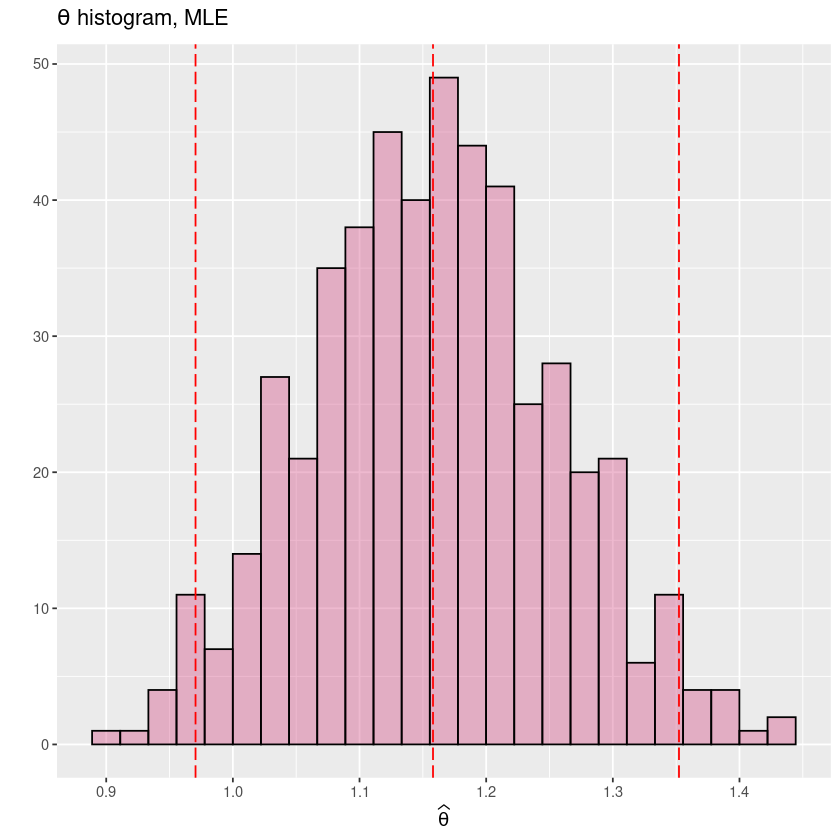

In [118]:
set.seed(1980)

n <- 500
theta <- 1.2

#x <- runif(n, 0, 1)

x_mod <- rbeta(n, 2.2, 1)

theta_hats <- rep(0, n)
theta_hats_alt <- rep(0, n)

for (i in 1:n){
    temp_set <- sample(x_mod, n, replace = TRUE)
    theta_hats[i] <- - 1 - 1 / mean(log(temp_set)) #MLE
    theta_hats_alt[i] <- (1 - 2 * mean(temp_set))/(mean(temp_set) - 1) #MOM
}

ggplot() + geom_histogram(boundary = 0, bins = 25, fill = "#d45087", 
                          alpha = 0.4, color = "black", aes(x = theta_hats)) +
           xlab("") + ylab("") + xlab(expression(widehat(theta))) + ggtitle(theta~ "histogram, MLE") + 
           geom_vline(mapping = NULL, xintercept = mu, linetype = "longdash", color = "red") + 
           geom_vline(mapping = NULL, xintercept = quantile(theta_hats, 0.025), linetype = "longdash", color = "red") + 
           geom_vline(mapping = NULL, xintercept = quantile(theta_hats, 0.975), linetype = "longdash", color = "red") 

mu <- mean(theta_hats)
mu_alt <- mean(theta_hats_alt)

se_theta <- sqrt(sum((theta_hats - mu)^2)/n)
se_theta_alt <- sqrt(sum((theta_hats_alt - mu_alt)^2)/n)

print(c(mu, se_theta))

print("The confidence interval is:")
print(c(quantile(theta_hats, 0.025), quantile(theta_hats, 0.975)))